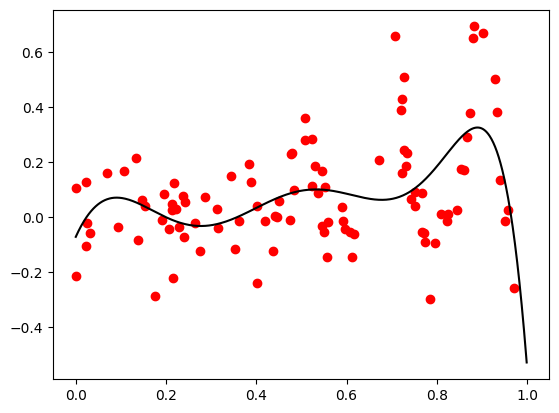

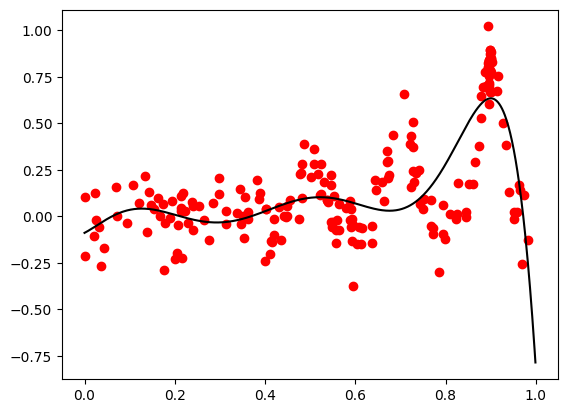

Best Result: x=0.895, y=1.020


/tmp/ipykernel_42179/259035238.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Best Result: x=%.3f, y=%.3f' % (X[ix], y[ix]))


In [1]:
# example of bayesian optimization for a 1d function from scratch
import numpy as np
import math
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
import matplotlib.pyplot as plt

# Objective function
def objective(x, noise=0.1):
  noise = np.random.normal(loc=0, scale=noise)
  return (x**2 * np.sin(5 * math.pi * x)**6.0) + noise

# surrogate or approximation for the objective function
def surrogate(model, X):
	return model.predict(X, return_std=True)

# optimize the acquisition function
def acquisition(X, model):

	# calculate the acquisition function for each sample
	yhat, _ = surrogate(model, X)
	best = max(yhat)

  # random search, generate random samples
	Xsamples = np.random.random(100)
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	# calculate mean and stdev via surrogate function
	mu, std = surrogate(model, Xsamples)
	# calculate the probability of improvement
	probs = norm.cdf((mu - best) / (std+1E-9))
	# locate the index of the largest scores
	ix = np.argmax(probs)
	return Xsamples[ix, 0]

# plot real observations vs surrogate function
def plot(X, y, model):
	# scatter plot of inputs and real objective function
	plt.scatter(X, y, color='red')
	# line plot of surrogate function across domain
	Xsamples = np.arange(0, 1, 0.001)
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	ysamples, _ = surrogate(model, Xsamples)
	plt.plot(Xsamples, ysamples, color='black')
	# show the plot
	plt.show()

# sample the domain sparsely with noise
X = np.random.random(100)
y = np.asarray([objective(x) for x in X])
# reshape into rows and cols
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
# define the model
model = GaussianProcessRegressor()
# fit the model
model.fit(X, y)
# plot before hand
plot(X, y, model)


# perform the optimization process
for i in range(100):
	# select the next point to sample
	x = acquisition(X, model)
	# sample the point
	actual = objective(x)
	# summarize the finding
	# est, _ = surrogate(model, [[x]])
	# add the data to the dataset
	X = np.vstack((X, [[x]]))
	y = np.vstack((y, [[actual]]))
	# update the model
	model.fit(X, y)

# plot all samples and the final surrogate function
plot(X, y, model)
# best result
ix = np.argmax(y)
print('Best Result: x=%.3f, y=%.3f' % (X[ix], y[ix]))

In [2]:
# Objective function
def objective(x, noise=0.1):
  noise = np.random.normal(loc=0, scale=noise)
  return (x**2 * np.sin(5 * math.pi * x)**6.0) + noise

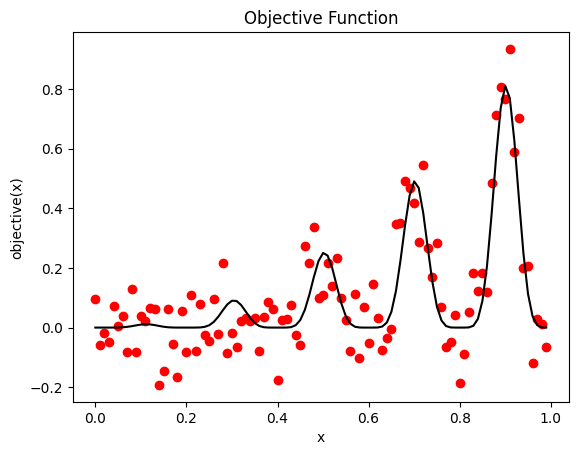

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Generate data
x_vals = np.arange(0, 1, 0.01)
y_vals = np.array([objective(x) for x in x_vals])

y_actual = np.array([objective(x, noise=0) for x in x_vals])

# Plot the function
plt.scatter(x_vals, y_vals, color='red')
plt.plot(x_vals, y_actual, color='black')
plt.title('Objective Function')
plt.xlabel('x')
plt.ylabel('objective(x)')
plt.show()

In [4]:
x_vals = np.arange(0, 1, 0.01)
x_vals

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [5]:
y_vals = np.array([objective(x) for x in x_vals])
y_vals

array([ 0.10618156, -0.12658261, -0.04439962, -0.05647021, -0.03686666,
        0.15280268, -0.11679387, -0.10035009, -0.16929191, -0.12499928,
        0.25234158,  0.09636349, -0.13118745, -0.15494456, -0.08443125,
       -0.049761  , -0.05898415,  0.00371771,  0.05689675,  0.0392248 ,
       -0.01297202, -0.1056729 ,  0.05193181, -0.06836293, -0.10106642,
       -0.04322324,  0.05707296,  0.05598084,  0.05376615,  0.16772698,
        0.29006937,  0.09268152,  0.05854349,  0.11853098,  0.02129991,
       -0.09556468,  0.15474559, -0.07251495,  0.02612056, -0.16190207,
       -0.05597946, -0.05965597, -0.09101334, -0.07167999,  0.01212688,
        0.11847176,  0.05404483,  0.16691848,  0.24691067,  0.2524619 ,
        0.31791276,  0.11120111,  0.29214784,  0.28726954,  0.19955382,
        0.05499868,  0.00908174, -0.05935257,  0.03533078, -0.05368283,
        0.07702144,  0.01877582, -0.19218267,  0.01719802,  0.05243578,
        0.00544201,  0.06465373,  0.10090529,  0.43501138,  0.58